# YanuX Cruncher #

## Import Libraries ##

In [1]:
%matplotlib inline
import scipy as sp                #SciPy
import numpy as np                #NumPy
import pandas as pd               #Pandas
import matplotlib.pyplot as plt   #Matplotlib

## Loading Data ##

### Load the model classes ###

A class responsible for loading a JSON file (or all the JSON files in a given directory) into a Python dictionary

In [2]:
from model.jsonloader import JsonLoader

A class that takes a set of Python dictionaries containing Wi-Fi logging data loaded from JSON files collected by the YanuX Scavenger Android application

In [3]:
from model.wifi import WifiLogs

#### Load data from the JSON files into Python objects ####

Load all files from the *data* folder.
The logs currently placed there were collected using the **Yanux Scavenger** Android application on April 28<sup>th</sup>, 2016 using an LG Nexus 5 running Androdid Marshmallow 6.0.1

In [4]:
json_loader = JsonLoader('data')

In [5]:
wifi_logs = WifiLogs(json_loader.json_data)

## Wi-Fi Readings

Convert the structured data that came from the JSON logs into a Pandas DataFrame

In [6]:
wifi_samples = pd.DataFrame.from_dict(wifi_logs.wifi_samples())

The whole table of unstructured Wi-Fi samples

In [7]:
wifi_samples

,filename,sample_id,x,y,floor,timestamp,mac_address,signal_strength
0,"point(31,22).json",0,31,22,2,764795455228,00:15:f9:6c:7a:e1,-84
1,"point(31,22).json",0,31,22,2,764795455226,00:15:f9:6c:7a:e0,-85
2,"point(31,22).json",0,31,22,2,764795455230,00:15:f9:6c:7a:e2,-85
3,"point(31,22).json",0,31,22,2,764795455208,00:12:da:9e:32:31,-62
4,"point(31,22).json",0,31,22,2,764795455217,00:15:f9:6c:7d:72,-48
5,"point(31,22).json",0,31,22,2,764795455213,00:15:f9:6c:7d:71,-48
6,"point(31,22).json",0,31,22,2,764795455215,00:15:f9:6c:7d:70,-48
7,"point(31,22).json",0,31,22,2,764795455206,00:12:da:9e:32:30,-62
8,"point(31,22).json",0,31,22,2,764795455222,00:11:21:6c:4e:72,-76
9,"point(31,22).json",0,31,22,2,764795455221,00:11:21:6c:4e:71,-75


In [18]:
wifi_samples.to_csv("wifi_samples.csv")

General statistics

In [8]:
wifi_samples.describe()

,sample_id,x,y,floor,timestamp,signal_strength
count,17346.000000,17346.000000,17346.000000,17346.0,1.734600e+04,17346.000000
mean,9.498732,35.467312,14.272685,2.0,7.667025e+11,-71.821630
std,5.758433,19.349594,9.145265,0.0,2.171812e+09,12.106861
min,0.000000,0.000000,1.000000,2.0,7.626591e+11,-92.000000
25%,5.000000,27.000000,2.000000,2.0,7.646580e+11,-82.000000
50%,9.000000,27.000000,22.000000,2.0,7.670140e+11,-74.000000
75%,15.000000,51.000000,22.000000,2.0,7.686302e+11,-64.000000
max,19.000000,75.000000,22.000000,2.0,7.701708e+11,-37.000000


Number of Unique Mac Addresses

In [9]:
mac_addresses = wifi_samples.mac_address.unique()
len(wifi_samples.mac_address.unique())

39

Signal Strength Standard Deviation

In [10]:
wifi_samples.signal_strength.mean()

-71.82163034705408

Signal Strength Standard Deviation

In [11]:
wifi_samples.signal_strength.std()

12.10686090456477

### Data Playground ####

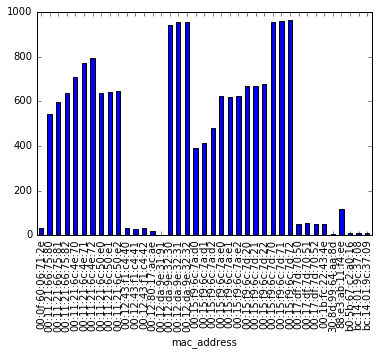

In [12]:
wifi_samples_mac_address_group = wifi_samples.groupby("mac_address")
wifi_samples_mac_address_group.size().plot(kind="bar")

In [13]:
wifi_samples_mac_address_group.size()

mac_address
00:0f:60:06:71:2e     33
00:11:21:66:75:80    544
00:11:21:66:75:81    595
00:11:21:66:75:82    639
00:11:21:6c:4e:70    709
00:11:21:6c:4e:71    771
00:11:21:6c:4e:72    792
00:11:21:6c:50:e0    635
00:11:21:6c:50:e1    643
00:11:21:6c:50:e2    647
00:12:43:f1:c4:40     30
00:12:43:f1:c4:41     27
00:12:43:f1:c4:42     30
00:12:80:17:ac:ae     17
00:12:da:9e:31:91      2
00:12:da:9e:32:30    940
00:12:da:9e:32:31    953
00:12:da:9e:32:32    955
00:15:f9:6c:7a:d0    392
00:15:f9:6c:7a:d1    413
00:15:f9:6c:7a:d2    479
00:15:f9:6c:7a:e0    622
00:15:f9:6c:7a:e1    619
00:15:f9:6c:7a:e2    622
00:15:f9:6c:7d:20    669
00:15:f9:6c:7d:21    668
00:15:f9:6c:7d:22    675
00:15:f9:6c:7d:70    956
00:15:f9:6c:7d:71    959
00:15:f9:6c:7d:72    962
00:17:df:7d:70:50     48
00:17:df:7d:70:51     53
00:17:df:7d:70:52     49
00:1b:fc:22:43:4e     50
30:8d:99:64:aa:8d      3
88:e3:ab:11:f4:ee    119
b0:5b:67:c2:a0:16     10
bc:14:01:9c:37:08      8
bc:14:01:9c:37:09      8
dtype: int64

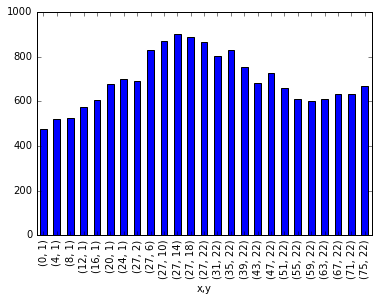

In [14]:
wifi_samples_coord_group = wifi_samples.groupby(["x", "y"])
wifi_samples_coord_group.size().plot(kind="bar")

In [15]:
wifi_samples_coord_group.size()

x   y 
0   1     475
4   1     520
8   1     527
12  1     575
16  1     606
20  1     679
24  1     700
27  2     691
    6     831
    10    869
    14    903
    18    887
    22    866
31  22    805
35  22    828
39  22    754
43  22    683
47  22    729
51  22    661
55  22    612
59  22    601
63  22    612
67  22    632
71  22    632
75  22    668
dtype: int64

In [16]:
for mac_address in mac_addresses:
    print("----------------------------------------------------------------")
    print(wifi_samples[wifi_samples.mac_address == mac_address])

----------------------------------------------------------------
                   filename  sample_id   x   y  floor     timestamp  \
0         point(31,22).json          0  31  22      2  764795455228   
22        point(31,22).json          1  31  22      2  764798748385   
44        point(31,22).json          2  31  22      2  764802068687   
64        point(31,22).json          3  31  22      2  764805388903   
84        point(31,22).json          4  31  22      2  764808653790   
105       point(31,22).json          5  31  22      2  764811930849   
125       point(31,22).json          6  31  22      2  764815193347   
146       point(31,22).json          7  31  22      2  764818555095   
166       point(31,22).json          8  31  22      2  764821896868   
187       point(31,22).json          9  31  22      2  764825209461   
207       point(31,22).json         10  31  22      2  764828489803   
228       point(31,22).json         11  31  22      2  764831833661   
248       po